In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import keras

In [2]:
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [4]:
print(len(train_images), len(test_images))

60000 10000


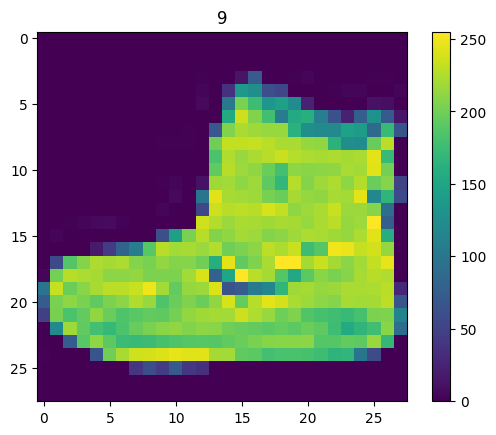

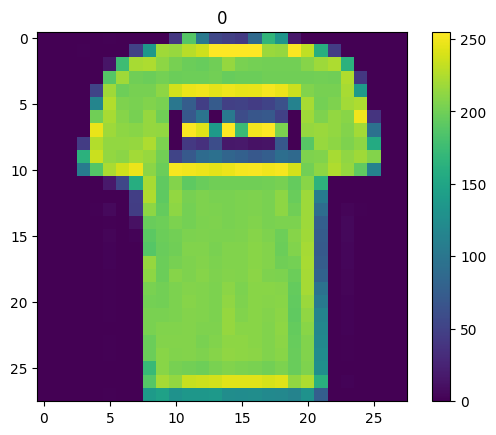

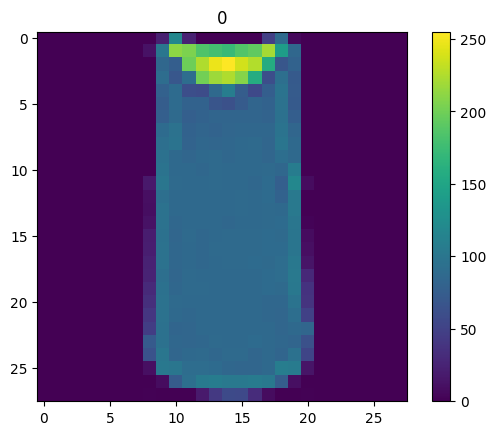

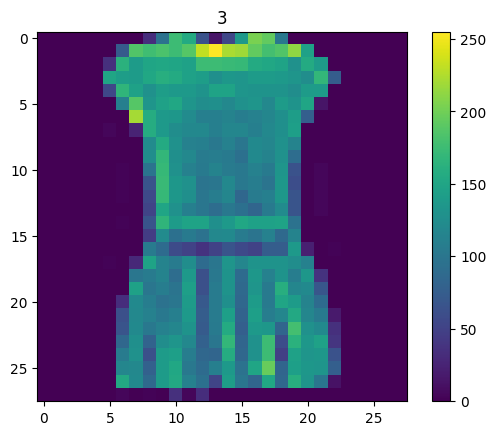

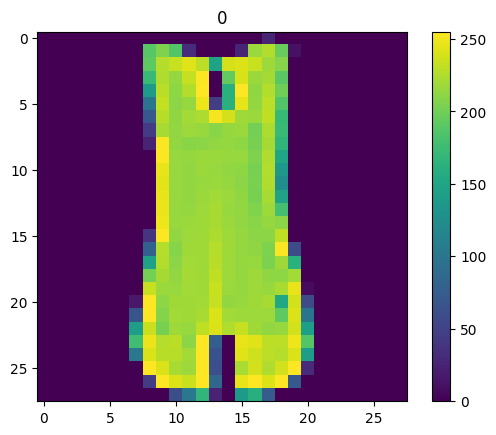

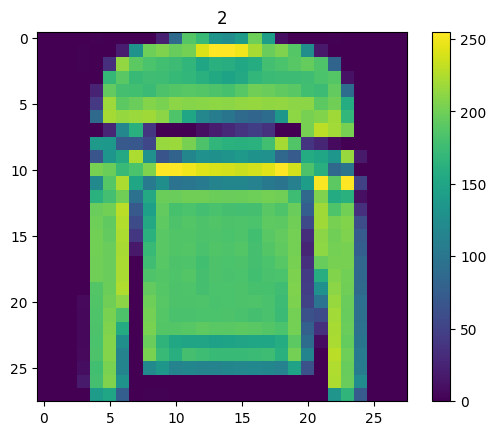

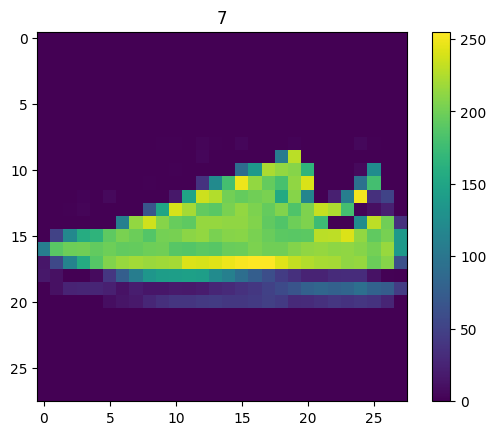

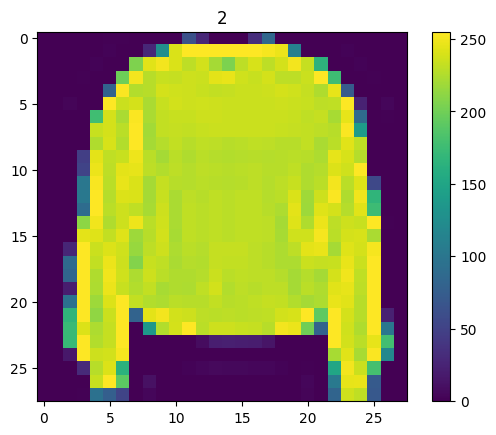

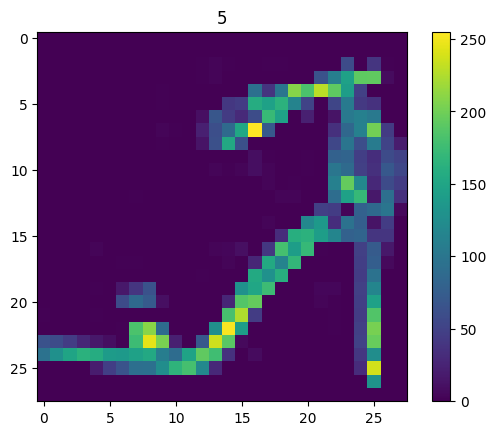

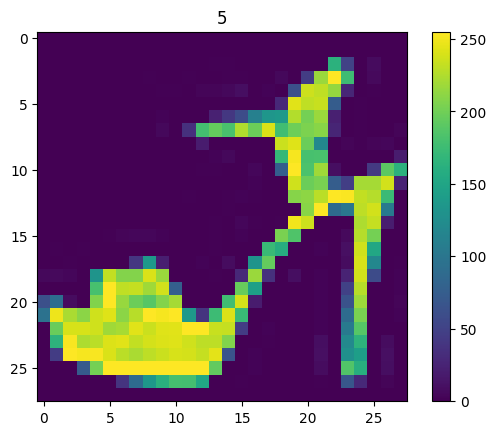

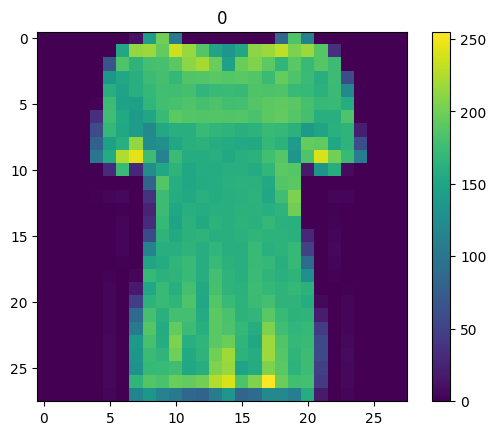

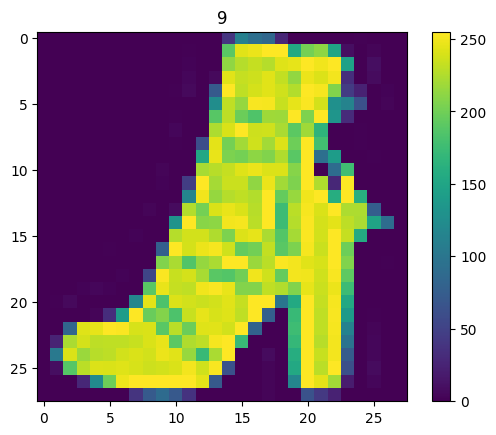

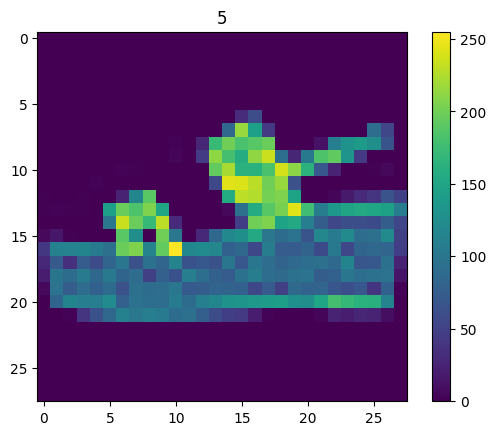

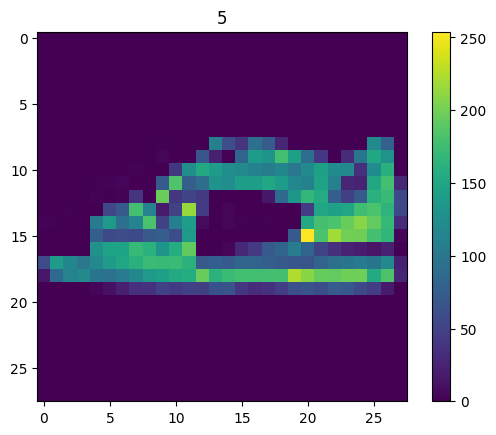

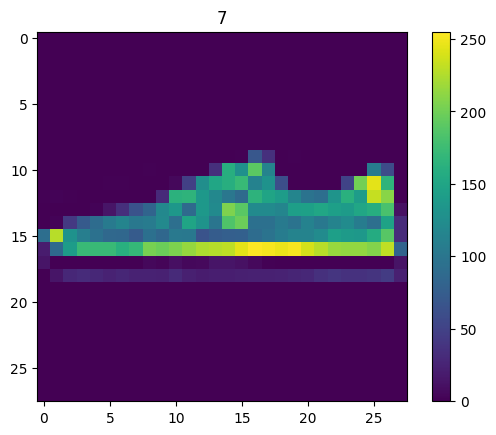

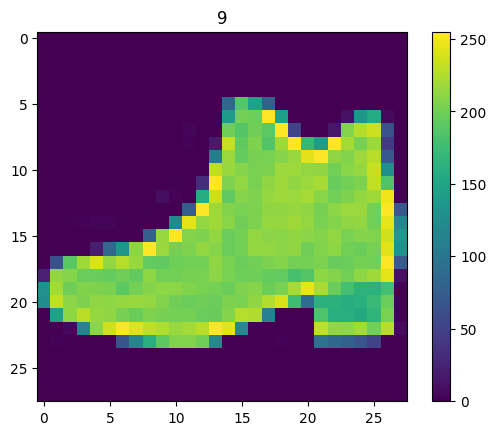

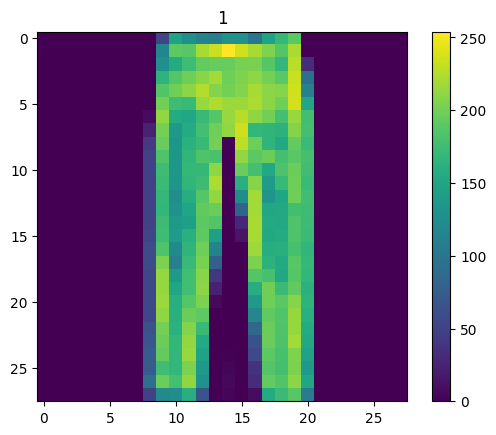

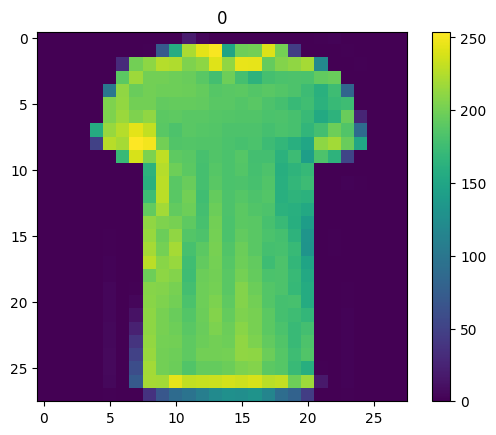

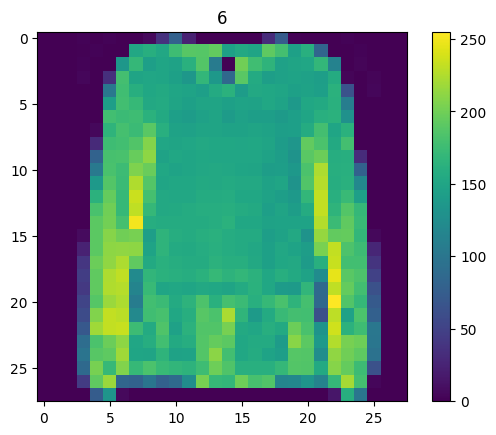

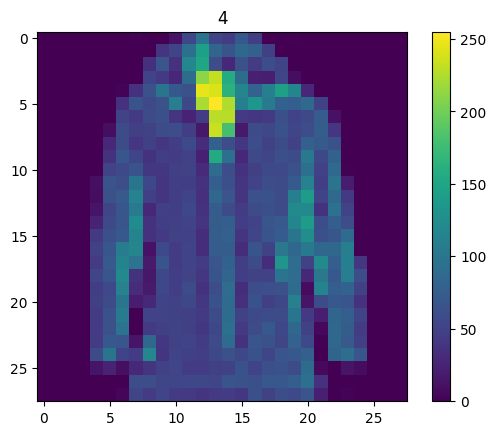

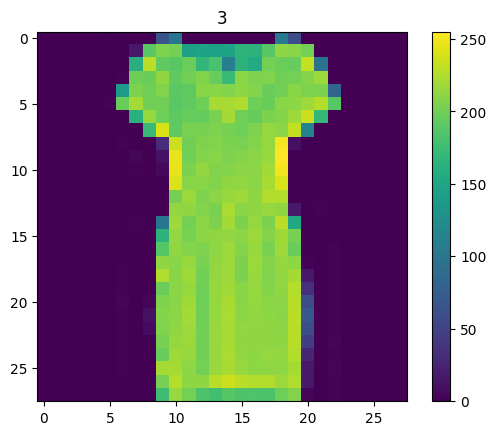

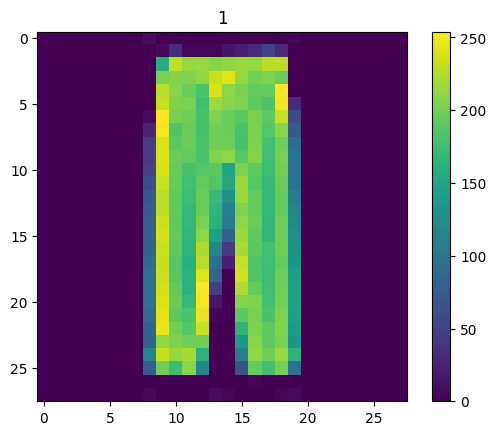

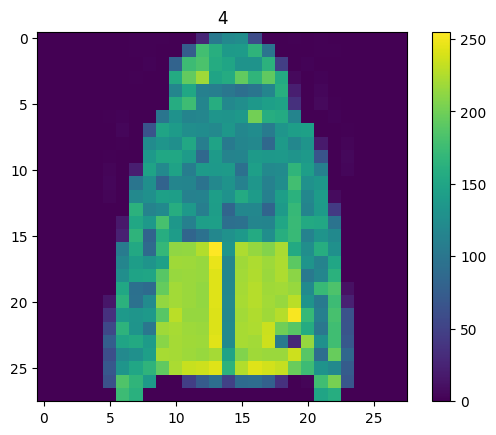

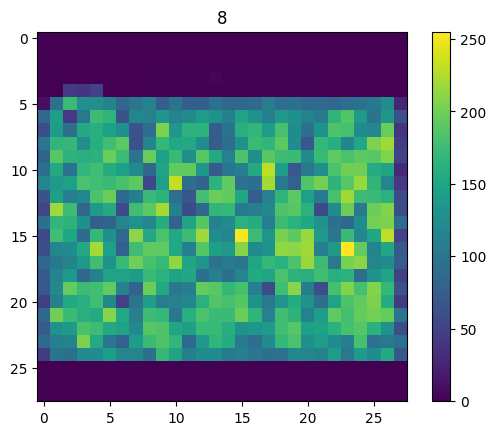

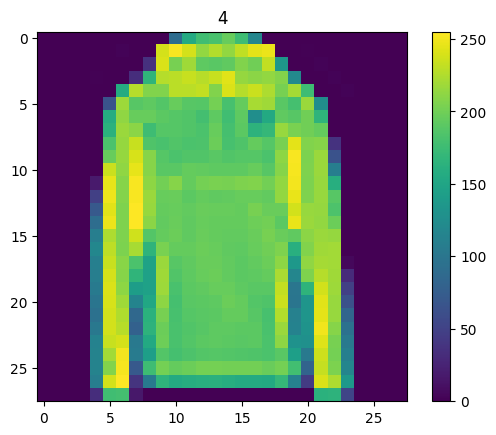

In [16]:
# to find out about the labels in the dataset

for i in range(0, 25):
  plt.imshow(train_images[i])
  plt.title(train_labels[i])
  plt.colorbar()
  plt.grid(False)
plt.show()
  #print(train_labels[i])

In [13]:
class_labels = ['t-shirt/top', 'trousers/pants', 'sweatshirt', 'dress', 'coat',
                'sandals', 'shirt', 'sneakers', 'bag', 'boots']

In [14]:
train_images.shape

(60000, 28, 28)

In [15]:
train_labels.shape

(60000,)

In [17]:
train_images = train_images/255.0
test_images = test_images/255.0

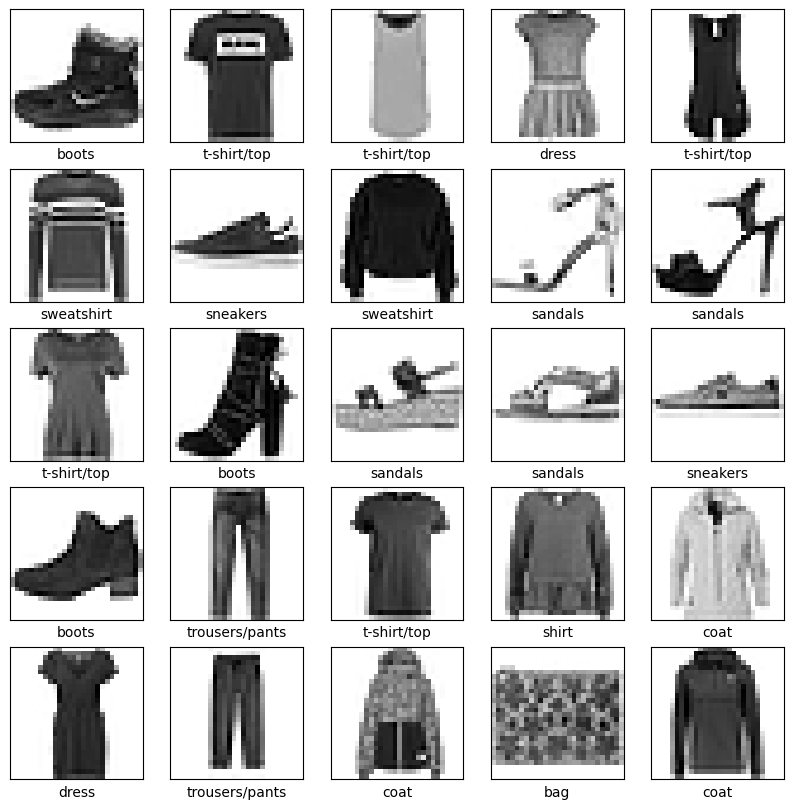

In [19]:
plt.figure(figsize=(10,10))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(train_images[i], cmap=plt.cm.binary)
  plt.xlabel(class_labels[train_labels[i]])
plt.show()

In [20]:
train_images = np.expand_dims(train_images, -1)
test_images = np.expand_dims(test_images, -1)

In [23]:
input_shape = (28, 28, 1)

In [24]:
len(class_labels)

10

In [25]:
train_labels = keras.utils.to_categorical(train_labels, len(class_labels))
test_labels = keras.utils.to_categorical(test_labels, len(class_labels))

In [26]:
train_labels

array([[0., 0., 0., ..., 0., 0., 1.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [27]:
model = keras.Sequential([
    keras.Input(shape=input_shape),
    keras.layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu'),
    keras.layers.MaxPooling2D(pool_size=(2,2)),
    keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu'),
    keras.layers.MaxPooling2D(pool_size=(2,2)),
    keras.layers.Conv2D(filters=128, kernel_size=(3,3), activation='relu'),
    keras.layers.MaxPooling2D(pool_size=(2,2)),
    keras.layers.Flatten(),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(len(class_labels), activation='softmax')

])

In [28]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 128)         73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 1, 1, 128)         0

In [30]:
batch_size=128
epochs=10

model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

model.fit(train_images, train_labels, batch_size=batch_size, epochs=epochs, validation_split=0.1)

Epoch 1/10
422/422 [==============================] - 53s 122ms/step - loss: 0.4324 - accuracy: 0.8462 - val_loss: 0.3721 - val_accuracy: 0.8630
Epoch 2/10
422/422 [==============================] - 53s 126ms/step - loss: 0.4062 - accuracy: 0.8543 - val_loss: 0.3568 - val_accuracy: 0.8695
Epoch 3/10
422/422 [==============================] - 51s 121ms/step - loss: 0.3833 - accuracy: 0.8615 - val_loss: 0.3417 - val_accuracy: 0.8742
Epoch 4/10
422/422 [==============================] - 54s 128ms/step - loss: 0.3669 - accuracy: 0.8663 - val_loss: 0.3250 - val_accuracy: 0.8785
Epoch 5/10
422/422 [==============================] - 51s 121ms/step - loss: 0.3543 - accuracy: 0.8716 - val_loss: 0.3220 - val_accuracy: 0.8777
Epoch 6/10
422/422 [==============================] - 53s 125ms/step - loss: 0.3386 - accuracy: 0.8768 - val_loss: 0.3106 - val_accuracy: 0.8868
Epoch 7/10
422/422 [==============================] - 51s 121ms/step - loss: 0.3293 - accuracy: 0.8797 - val_loss: 0.2988 - val_ac

In [31]:
score = model.evaluate(test_images, test_labels, verbose=1)
print("Test Loss:", score[0])
print("Test Accuracy:", score[1])

313/313 [==============================] - 6s 18ms/step - loss: 0.3099 - accuracy: 0.8877
Test Loss: 0.30987223982810974
Test Accuracy: 0.8877000212669373
